<a href="https://colab.research.google.com/github/Mohammad-H-Zahrawi/Challenges-Kaggle/blob/main/Blood%20Cell%20Images/blood2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import pathlib
import random
import matplotlib.image as mpimg
import os
import sklearn.metrics as mc
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image

In [ ]:
import requests
import zipfile
import io
zip_file_url = 'https://github.com/Mohammad-H-Zahrawi/Challenges-Kaggle/raw/main/Blood%20Cell%20Images/blood-cell-images-based-classification.zip'
response = requests.get(zip_file_url)
with zipfile.ZipFile(io.BytesIO(response.content)) as zip_ref:
    zip_ref.extractall('/content/')

train = pd.read_csv('https://raw.githubusercontent.com/Mohammad-H-Zahrawi/Challenges-Kaggle/main/Blood%20Cell%20Images/train.csv')
test = pd.read_csv('https://raw.githubusercontent.com/Mohammad-H-Zahrawi/Challenges-Kaggle/main/Blood%20Cell%20Images/test.csv')
# pd.set_option('display.max_rows', None)
# pd.set_option('display.max_columns', None)
# pd.set_option('display.width', None)

In [ ]:
data_dir = r"/content/Images/Images"  # Replace with your actual data directory

list_images = os.listdir(data_dir)
image_numbers = []  # Extracting image numbers
images_path = []    # Extracting image paths

for i in list_images:
    image_name = os.path.join(data_dir, i)
    images_path.append(image_name)
    try:
        # Adjust indices based on the actual format of your filenames
        image_number = int(i[-7:-4])
        image_numbers.append(image_number)
    except ValueError:
        print(f"Skipping file {i}: cannot extract a valid number")
tf=pd.read_csv('testf.csv')
#print("Extracted image numbers:", image_numbers)
#print("Extracted image paths:", images_path)

In [ ]:
#creating dataframe
images = pd.DataFrame(columns=['image_path','Image'])
images['image_path'] = images_path
images['Image'] = image_numbers
train1=pd.merge(train, images, on='Image')
test1 = pd.merge(test, images, on='Image')
test1.head()

,Image,image_path
0,94,/content/Images/Images/BloodImage_00094.jpg
1,18,/content/Images/Images/BloodImage_00018.jpg
2,7,/content/Images/Images/BloodImage_00007.jpg
3,139,/content/Images/Images/BloodImage_00139.jpg
4,311,/content/Images/Images/BloodImage_00311.jpg


In [ ]:
train1.head(3)

,Image,Category,image_path
0,307,NEUTROPHIL,/content/Images/Images/BloodImage_00307.jpg
1,1,NEUTROPHIL,/content/Images/Images/BloodImage_00001.jpg
2,163,NEUTROPHIL,/content/Images/Images/BloodImage_00163.jpg


In [ ]:
def ac_color(t):
    if t=='NEUTROPHIL':
        return'n_red'
    elif t=='EOSINOPHIL':
        return 'e_pink'
    else:
        return 'blue'
# train1['ac_color']=train1['Category'].apply(ac_color)
# test1['ac_color']=test1['Category'].apply(ac_color)

In [ ]:
def color_s(image):

    im=cv2.imread(image)
    im_rgb = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
    color=''
#[80, 149, 199]
#[144, 190, 230]
    b_lower_bound=np.array([80, 148, 196]) #148 BEST till now
    b_upper_bound=np.array([149, 190, 230])#149 best till now
    b_pixel_mask=cv2.inRange(im_rgb, b_lower_bound, b_upper_bound)
    b_pixel_count=cv2.countNonZero(b_pixel_mask)


    # n_lower_bound=np.array([182, 175, 207])
    # n_upper_bound=np.array([189, 186, 208])
    # n_pixel_mask=cv2.inRange(im_rgb, n_lower_bound, n_upper_bound)
    # n_pixel_count=cv2.countNonZero(n_pixel_mask)


    #e_lower_bound=np.array([(164, 100, 185)])
    #e_upper_bound=np.array([(181, 123, 190)])



    e_lower_bound=np.array([(164, 100, 185)]) #164 better for now
    e_upper_bound=np.array([(181, 123, 194)])
    e_pixel_mask=cv2.inRange(im_rgb, e_lower_bound, e_upper_bound)
    e_pixel_count=cv2.countNonZero(e_pixel_mask)


    # if n_pixel_count>e_pixel_count:
    #     color='n_red'
    #     return color

    if e_pixel_count>1.5:
        color='e_pink'
        return color
    elif b_pixel_count>10:
         color='blue'
         return color
    else:
        color='n_red'
        return color


0.7321428571428571
              precision    recall  f1-score   support

        blue       0.86      0.75      0.80         8
      e_pink       0.76      0.76      0.76        25
       n_red       0.67      0.70      0.68        23

    accuracy                           0.73        56
   macro avg       0.76      0.74      0.75        56
weighted avg       0.74      0.73      0.73        56

[[ 6  0  2]
 [ 0 19  6]
 [ 1  6 16]]


color
e_pink    25
n_red     24
blue       7
Name: count, dtype: int64

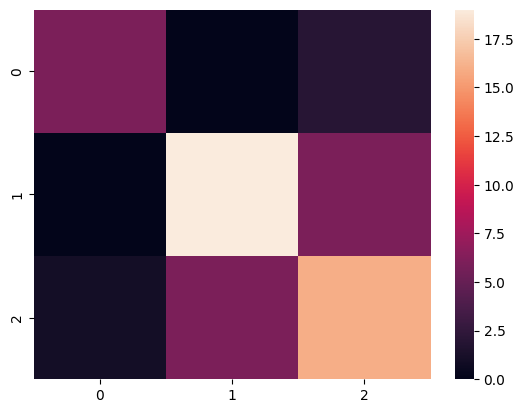

In [ ]:
train1['color']=train1['Category'].apply(ac_color)
test1['color']=test1['image_path'].apply(color_s)
test1['ac_c']=tf['Category'].apply(ac_color)
print(mc.accuracy_score(test1['ac_c'],test1['color']))
print(mc.classification_report(test1['ac_c'],test1['color']))
print(mc.confusion_matrix(test1['ac_c'],test1['color']))
sns.heatmap(mc.confusion_matrix(test1['ac_c'],test1['color']))
test1['color'].value_counts()

In [ ]:
def purple_matter(image):
     im=cv2.imread(image)
     im_rgb = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
     lower_bound = np.array([98, 60, 192])  # Darker red
     upper_bound = np.array([180, 150, 235])  # Lighter red

# # Create the mask
     mask = cv2.inRange(im_rgb, lower_bound, upper_bound)

# # Count the number of pixels within the range
     pixel_count = cv2.countNonZero(mask)
     return pixel_count

 # print(f'Number of pixels in the red color range: {pixel_count}')
train1['purple']=train1['image_path'].apply(purple_matter)
test1['purple']=test1['image_path'].apply(purple_matter)
test1.head(3)

,Image,image_path,color,ac_c,purple
0,94,/content/Images/Images/BloodImage_00094.jpg,e_pink,e_pink,13731
1,18,/content/Images/Images/BloodImage_00018.jpg,n_red,n_red,8377
2,7,/content/Images/Images/BloodImage_00007.jpg,n_red,n_red,10977


In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
train1['color']=le.fit_transform(train1['color'])
test1['color']=le.transform(test1['color'])

# ResNet

In [ ]:
im=cv2.imread('/content/Images/Images/BloodImage_00001.jpg')
im_rgb = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
im_rgb = cv2.cvtColor(im_rgb, cv2.COLOR_BGR2GRAY)

success = cv2.imwrite('/content/sample_data/i.jpg', im_rgb)

In [ ]:
# import tensorflow as tf
import tensorflow.keras.applications
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.preprocessing import image as keras_image
from tensorflow.keras.applications.resnet50 import preprocess_input

In [ ]:
model = ResNet50(weights='imagenet', include_top=False, pooling='avg')


94765736/94765736 [==============================] - 0s 0us/step


In [ ]:
os.makedirs('noisy')
data_dir = '/content/Images/Images'

def png_jpg(img):
  if img.dtype in ['float32','float64']:
    img = np.multiply(img, 255, out=img, casting='unsafe')

    img = img.astype(np.uint8)
  else:
    img=img
  return img

def clahe(img):
  img = png_jpg(img)
  if len(img.shape)>2:
    if img.shape[2] ==4:

      R, G, B , other = cv2.split(img)
      output1_R = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8)).apply(R)
      output1_G = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8)).apply(G)
      output1_B = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8)).apply(B)
      output1_other = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8)).apply(other)
      clah = cv2.merge((output1_R, output1_G, output1_B, output1_other))

    elif img.shape[2] ==3:
      R, G, B  = cv2.split(img)
      output1_R = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8)).apply(R)
      output1_G = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8)).apply(G)
      output1_B = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8)).apply(B)
      clah = cv2.merge((output1_R, output1_G, output1_B))

    else:
      clah = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8)).apply(img)

  else:
    clah = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8)).apply(img)

  return clah

for image in os.listdir(data_dir):
    imagepath= os.path.join(data_dir, image)
    im=cv2.imread(imagepath)
    im_rgb = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
    im_rgb = cv2.cvtColor(im_rgb, cv2.COLOR_BGR2GRAY)

    # im_rgb = clahe(im_rgb)
    newpath = os.path.join('noisy',image)
    success = cv2.imwrite(newpath, im_rgb)


In [ ]:
im=cv2.imread('/content/noisy/BloodImage_00001.jpg')
im

In [ ]:
# path = '/content/Images/Images'
model = ResNet50(weights='imagenet', include_top=False, pooling='avg')

path = '/content/noisy'
features={}
for image in os.listdir(path):
    if image.endswith('.jpg'):
        imagepath= os.path.join(path, image)
        img = keras_image.load_img(imagepath, target_size=(64, 64))  # ResNet50 expects 224x224 images
        img_array = keras_image.img_to_array(img)  # Convert image to numpy array
        img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
        img_array = preprocess_input(img_array)  # Preprocess the image for ResNet50
        # Extract features
        feature = model.predict(img_array)
        features[imagepath]=feature


1/1 [==============================] - 0s 56ms/step


In [ ]:
resnet_df = pd.DataFrame.from_dict({k: v.flatten() for k, v in features.items()}, orient='index')

In [ ]:
resnet_df.head(2)

,0,1,2,3,4,5,6,7,8,9,...,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047
/content/noisy/BloodImage_00063.jpg,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,1.258094,0.0,0.135926
/content/noisy/BloodImage_00014.jpg,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.332883,0.0,0.0,0.0,0.0,3.124621,0.0,0.557452


In [ ]:
resnet_df.reset_index(inplace=True)
resnet_df['Image'] = resnet_df['index'].apply(lambda x:int(x[-7:-4]))


In [ ]:
train1

,Image,Category,image_path,color,purple
0,307,NEUTROPHIL,/content/Images/Images/BloodImage_00307.jpg,2,11591
1,1,NEUTROPHIL,/content/Images/Images/BloodImage_00001.jpg,2,10916
2,163,NEUTROPHIL,/content/Images/Images/BloodImage_00163.jpg,2,10224
3,409,NEUTROPHIL,/content/Images/Images/BloodImage_00409.jpg,2,16577
4,290,EOSINOPHIL,/content/Images/Images/BloodImage_00290.jpg,1,20195
...,...,...,...,...,...
217,178,NEUTROPHIL,/content/Images/Images/BloodImage_00178.jpg,2,14627
218,376,EOSINOPHIL,/content/Images/Images/BloodImage_00376.jpg,1,15863
219,319,EOSINOPHIL,/content/Images/Images/BloodImage_00319.jpg,1,17060
220,292,EOSINOPHIL,/content/Images/Images/BloodImage_00292.jpg,1,8589


In [ ]:
train2 = pd.merge(train1, resnet_df, on='Image')
test2 = pd.merge(test1, resnet_df, on='Image')


In [ ]:
train2.head(2)

,Image,Category,image_path,color,purple,index,0,1,2,3,...,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047
0,307,NEUTROPHIL,/content/Images/Images/BloodImage_00307.jpg,2,11591,/content/noisy/BloodImage_00307.jpg,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,2.689012,0.0,0.597860
1,1,NEUTROPHIL,/content/Images/Images/BloodImage_00001.jpg,2,10916,/content/noisy/BloodImage_00001.jpg,0.0,0.0,0.0,0.0,...,0.0,0.0,0.330454,0.025405,0.0,0.0,0.0,3.712306,0.0,0.816902


In [ ]:
X=train2.drop(['image_path','Category', 'Image', 'index'],axis=1)
y=train2['Category']
X.head()

,color,purple,0,1,2,3,4,5,6,7,...,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047
0,2,11591,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,2.689012,0.000000,0.597860
1,2,10916,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.330454,0.025405,0.0,0.0,0.0,3.712306,0.000000,0.816902
2,2,10224,0.023458,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,3.032068,0.000000,0.003418
3,2,16577,0.000000,0.0,0.0,0.0,0.0,0.0,0.019551,0.0,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,2.257720,0.000000,0.467105
4,1,20195,0.000000,0.0,0.0,0.0,0.0,0.0,1.025356,0.0,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,1.699008,0.017835,1.371643


In [ ]:
X.head(1)

,color,purple,0,1,2,3,4,5,6,7,...,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047
0,2,11591,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.689012,0.0,0.59786


In [ ]:
test2.head(1)

,Image,image_path,color,ac_c,purple,index,0,1,2,3,...,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047
0,94,/content/Images/Images/BloodImage_00094.jpg,1,e_pink,13731,/content/noisy/BloodImage_00094.jpg,0.035803,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.787895,0.0,0.0


In [ ]:
test_data  = test2.drop(['image_path', 'Image' , 'index', 'ac_c'], axis=1)

In [ ]:
X.shape, test_data.shape

((222, 2050), (56, 2050))

# CNN

In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import Model

In [ ]:
model = VGG16()
# print(model.summary())
model = Model(inputs=model.inputs, outputs=model.layers[-2].output)

553467096/553467096 [==============================] - 19s 0us/step


In [ ]:
path = '/content/Images/Images'
features={}
for image in os.listdir(path):
    imagepath= os.path.join(path, image)
    img = load_img(imagepath, target_size=(224,224))

    img = img_to_array(img)
    expanded_img_array = np.expand_dims(img, axis=0)

    img = img.reshape((1, img.shape[0], img.shape[1], img.shape[2]))
    img = preprocess_input(img)
    feature = model.predict(img, verbose=0)
    features[imagepath]=feature

In [ ]:
cnn_df = pd.DataFrame.from_dict({k: v.flatten() for k, v in features.items()}, orient='index')

In [ ]:
cnn_df.reset_index(inplace=True)
cnn_df['Image'] = cnn_df['index'].apply(lambda x:int(x[-7:-4]))

In [ ]:
myfeature = pd.read_csv('/content/myfeaturescolor.csv')
myfeaturetest = pd.read_csv('/content/myFeatureColotTest.csv')

In [ ]:
myfeature.head(2)

,Image,Category,image_path,area_pink,area_red,area_blue,ratio,redness
0,307,NEUTROPHIL,/content/Images/Images/BloodImage_00307.jpg,1.680664,2.058919,3.783854,1.225063,3.739583
1,1,NEUTROPHIL,/content/Images/Images/BloodImage_00001.jpg,0.204753,0.035482,3.668945,0.173291,0.240234


In [ ]:
myfeature.drop(['image_path', 'Category'], axis=1, inplace=True)
myfeaturetest.drop(['image_path'], axis=1, inplace=True)


In [ ]:
train2 = pd.merge(train1, resnet_df, on='Image')
test2 = pd.merge(test1, resnet_df, on='Image')


In [ ]:
train2.head()

,Image,Category,image_path,color,purple,index,0,1,2,3,...,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047
0,307,NEUTROPHIL,/content/Images/Images/BloodImage_00307.jpg,2,10740,/content/noisy/BloodImage_00307.jpg,1.249214,0.163851,0.0,0.000000,...,0.008357,0.00000,0.136106,1.730886,0.000000,0.014556,0.006373,0.233265,0.020819,0.207463
1,1,NEUTROPHIL,/content/Images/Images/BloodImage_00001.jpg,2,13210,/content/noisy/BloodImage_00001.jpg,2.789117,0.000000,0.0,0.006532,...,0.324048,0.00000,0.393241,0.824382,0.006505,0.082590,0.000000,0.151278,0.060837,0.229662
2,163,NEUTROPHIL,/content/Images/Images/BloodImage_00163.jpg,2,8169,/content/noisy/BloodImage_00163.jpg,2.197661,0.000000,0.0,0.156041,...,0.001838,0.00000,0.629977,0.166318,0.006528,0.000000,0.000000,0.016795,0.052131,0.404106
3,409,NEUTROPHIL,/content/Images/Images/BloodImage_00409.jpg,2,19608,/content/noisy/BloodImage_00409.jpg,1.256453,0.018685,0.0,0.062539,...,0.004506,0.01969,0.292230,0.470036,0.109210,0.000000,0.000000,0.168728,0.000000,0.205475
4,290,EOSINOPHIL,/content/Images/Images/BloodImage_00290.jpg,1,23038,/content/noisy/BloodImage_00290.jpg,2.049521,0.000000,0.0,0.006692,...,0.045183,0.00000,0.342164,1.052972,0.000000,0.000000,0.000000,0.137622,0.004925,0.545691


In [ ]:
train2.head(2)

,Image,Category,image_path,color,purple,index,0,1,2,3,...,2043,2044,2045,2046,2047,area_pink,area_red,area_blue,ratio,redness
0,307,NEUTROPHIL,/content/Images/Images/BloodImage_00307.jpg,2,10740,/content/noisy/BloodImage_00307.jpg,1.249214,0.163851,0.0,0.000000,...,0.014556,0.006373,0.233265,0.020819,0.207463,1.680664,2.058919,3.783854,1.225063,3.739583
1,1,NEUTROPHIL,/content/Images/Images/BloodImage_00001.jpg,2,13210,/content/noisy/BloodImage_00001.jpg,2.789117,0.000000,0.0,0.006532,...,0.082590,0.000000,0.151278,0.060837,0.229662,0.204753,0.035482,3.668945,0.173291,0.240234


In [ ]:
train2  = pd.merge(train2, myfeature, on='Image')
test2  = pd.merge(test2, myfeaturetest, on='Image')

In [ ]:
# #delete me
# train2 = pd.merge(train1, myfeature, on='Image')
# test2 = pd.merge(test1, myfeaturetest, on='Image')


In [ ]:
train2.head(2)

,Image,Category,image_path,color,purple,index,0,1,2,3,...,4086,4087,4088,4089,4090,4091,4092,4093,4094,4095
0,307,NEUTROPHIL,/content/Images/Images/BloodImage_00307.jpg,2,10740,/content/Images/Images/BloodImage_00307.jpg,0.000000,0.0,0.0,2.288608,...,1.915147,1.714684,0.373318,0.0,0.000000,0.0,0.0,0.0,1.961302,1.734123
1,1,NEUTROPHIL,/content/Images/Images/BloodImage_00001.jpg,2,13210,/content/Images/Images/BloodImage_00001.jpg,0.565257,0.0,0.0,0.000000,...,2.620096,0.912867,1.366162,0.0,0.691937,0.0,0.0,0.0,2.422406,0.536216


In [ ]:
X=train2.drop(['image_path','Category', 'Image'],axis=1)
y=train2['Category']
X.head()

,color,purple,index,0,1,2,3,4,5,6,...,2043,2044,2045,2046,2047,area_pink,area_red,area_blue,ratio,redness
0,2,10740,/content/noisy/BloodImage_00307.jpg,1.249214,0.163851,0.0,0.000000,0.138869,0.106785,0.000000,...,0.014556,0.006373,0.233265,0.020819,0.207463,1.680664,2.058919,3.783854,1.225063,3.739583
1,2,13210,/content/noisy/BloodImage_00001.jpg,2.789117,0.000000,0.0,0.006532,0.288835,0.335197,0.001163,...,0.082590,0.000000,0.151278,0.060837,0.229662,0.204753,0.035482,3.668945,0.173291,0.240234
2,2,8169,/content/noisy/BloodImage_00163.jpg,2.197661,0.000000,0.0,0.156041,0.963097,0.083559,0.000000,...,0.000000,0.000000,0.016795,0.052131,0.404106,0.905273,1.034831,3.386068,1.143114,1.940104
3,2,19608,/content/noisy/BloodImage_00409.jpg,1.256453,0.018685,0.0,0.062539,0.479557,0.000000,0.000000,...,0.000000,0.000000,0.168728,0.000000,0.205475,1.819661,1.898438,5.844076,1.043292,3.718099
4,1,23038,/content/noisy/BloodImage_00290.jpg,2.049521,0.000000,0.0,0.006692,0.746992,0.774997,0.000000,...,0.000000,0.000000,0.137622,0.004925,0.545691,1.145182,4.174805,6.185872,3.645537,5.319987


In [ ]:
test_data  = test2.drop(['image_path', 'Image' ], axis=1)

In [ ]:
test_data.head()

,color,purple,index,0,1,2,3,4,5,6,...,2043,2044,2045,2046,2047,area_pink,area_red,area_blue,ratio,redness
0,1,15846,/content/noisy/BloodImage_00094.jpg,1.705217,0.000000,0.00000,0.005050,0.131715,0.532143,0.009639,...,0.000000,0.000000,0.349336,0.000000,0.817931,0.429036,1.259440,4.485677,2.935508,1.688477
1,2,8847,/content/noisy/BloodImage_00018.jpg,2.754808,0.007840,0.00000,0.005792,0.161905,0.403720,0.000000,...,0.108280,0.028432,0.387199,0.105600,0.527991,0.779297,0.527669,2.830404,0.677109,1.306966
2,2,12243,/content/noisy/BloodImage_00007.jpg,3.430609,0.049818,0.05474,0.093841,0.115678,0.460779,0.000511,...,0.208652,0.165933,0.160619,0.012516,0.286442,0.511719,0.238607,3.567383,0.466285,0.750326
3,2,11292,/content/noisy/BloodImage_00139.jpg,2.538656,0.000000,0.00000,0.047340,0.281775,0.247854,0.000000,...,0.000000,0.000000,0.181979,0.119169,0.274478,0.532878,0.595378,3.190430,1.117288,1.128255
4,0,14645,/content/noisy/BloodImage_00311.jpg,3.533187,0.000000,0.00000,0.000000,0.274362,0.215890,0.000000,...,0.011764,0.000000,0.576428,0.000000,0.773200,0.671224,1.779297,4.353190,2.650824,2.450521


In [ ]:
X.shape

(222, 2056)

In [ ]:
test_data.head(2)

,color,purple,0,1,2,3,4,5,6,7,...,2043,2044,2045,2046,2047,area_pink,area_red,area_blue,ratio,redness
0,1,15846,1.705217,0.00000,0.0,0.005050,0.131715,0.532143,0.009639,0.000000,...,0.00000,0.000000,0.349336,0.0000,0.817931,0.429036,1.259440,4.485677,2.935508,1.688477
1,2,8847,2.754808,0.00784,0.0,0.005792,0.161905,0.403720,0.000000,0.001559,...,0.10828,0.028432,0.387199,0.1056,0.527991,0.779297,0.527669,2.830404,0.677109,1.306966


In [ ]:
X.drop('index', axis=1, inplace=True)
test_data.drop('index', axis=1, inplace=True)

## catboost

In [ ]:
!pip install catboost

In [ ]:
from catboost import CatBoostClassifier
model = CatBoostClassifier(
    #  task_type='GPU',
     iterations=300, #best value till now
     learning_rate=0.1,
     depth=8,
     random_seed=42,
     thread_count=-1,
     loss_function='MultiClass',
 )
model.fit(X, y)
y_pred = model.predict(X)

0:	learn: 1.2901759	total: 5.12s	remaining: 25m 30s
1:	learn: 1.2169882	total: 8.4s	remaining: 20m 51s
2:	learn: 1.1437241	total: 10.9s	remaining: 18m 2s
3:	learn: 1.0522772	total: 14.1s	remaining: 17m 22s
4:	learn: 0.9829984	total: 17.8s	remaining: 17m 30s
5:	learn: 0.9118859	total: 20.3s	remaining: 16m 35s
6:	learn: 0.8710374	total: 22.8s	remaining: 15m 55s
7:	learn: 0.8232035	total: 25.4s	remaining: 15m 25s
8:	learn: 0.7737254	total: 28.7s	remaining: 15m 29s
9:	learn: 0.7142492	total: 32.1s	remaining: 15m 31s
10:	learn: 0.6905627	total: 34.6s	remaining: 15m 9s
11:	learn: 0.6684417	total: 37.2s	remaining: 14m 52s
12:	learn: 0.6425219	total: 39.7s	remaining: 14m 36s
13:	learn: 0.6000615	total: 43.3s	remaining: 14m 44s
14:	learn: 0.5678370	total: 46.5s	remaining: 14m 44s
15:	learn: 0.5495682	total: 49.1s	remaining: 14m 30s
16:	learn: 0.5182317	total: 51.6s	remaining: 14m 18s
17:	learn: 0.5003092	total: 54.1s	remaining: 14m 8s
18:	learn: 0.4786872	total: 57.9s	remaining: 14m 16s
19:	lea

In [ ]:
from sklearn.metrics import f1_score
pred = model.predict(test_data)
tf=pd.read_csv('testf.csv')
yt=pred.flatten()

testScore = f1_score(tf['Category'], yt, average='micro')
print('F1 score for test', testScore)

F1 score for test 0.6964285714285714


# xgboost

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
train_labels_encoded = label_encoder.fit_transform(y)
label_encoder.classes_

array(['EOSINOPHIL', 'LYMPHOCYTE', 'MONOCYTE', 'NEUTROPHIL'], dtype=object)

In [ ]:
len(train_labels_encoded)

222

In [ ]:
X.columns = X.columns.astype(str)
test_data.columns = test_data.columns.astype(str)

In [ ]:
import xgboost as xgb
from sklearn.model_selection  import cross_val_score

from sklearn.model_selection import train_test_split
xgb_model = xgb.XGBClassifier(objective='multi:softmax', num_class=4 , #tree_method = "hist", device = "cuda",
                              n_estimators=400,  learning_rate=0.1,  max_depth=8)
# cv_scores = cross_val_score(xgb_model, X, train_labels_encoded,  cv=10, scoring='f1_micro')

xgb_model.fit(X, train_labels_encoded)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=8, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=400, n_jobs=None, num_class=4,
              num_parallel_tree=None, ...)

In [ ]:
pred_train = xgb_model.predict(X)
from sklearn.metrics import f1_score
trainScore = f1_score(train_labels_encoded, pred_train, average='micro')
print('F1 score for train', trainScore)


F1 score for train 1.0


In [ ]:
pred_xgboost = xgb_model.predict(test_data)
pred_xgboost = label_encoder.inverse_transform(pred_xgboost)
testScore = f1_score(tf['Category'], pred_xgboost, average='micro')
print('F1 score for test', testScore)

F1 score for test 0.7321428571428571


In [ ]:
pred_xgboost_p = xgb_model.predict_proba(test_data)


In [ ]:
tf = pd.read_csv('/content/testf.csv')

In [ ]:
te = test.copy()
te['Category'] = pred
te.head()


NameError: name 'pred' is not defined

In [ ]:
te.to_csv('CNNandMohannadFeatures.csv', index=False)

# other models

In [ ]:
#array(['EOSINOPHIL', 'LYMPHOCYTE', 'MONOCYTE', 'NEUTROPHIL'], dtype=object)


In [ ]:
#hgbc
from sklearn.ensemble import HistGradientBoostingClassifier
clf = HistGradientBoostingClassifier(max_iter=300).fit(X, train_labels_encoded)

hgbc=clf.predict(test_data)
hgbc = label_encoder.inverse_transform(hgbc)
f1_score(tf['Category'], hgbc, average='micro')


0.7321428571428571

In [ ]:
#logistic
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=1000).fit(X, train_labels_encoded)

logistic=model.predict(test_data)
logistic = label_encoder.inverse_transform(logistic)
f1_score(tf['Category'], logistic, average='micro')


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.42857142857142855

In [ ]:
logistic_p=model.predict_proba(test_data)
logistic=model.predict(test_data)

In [ ]:
logistic

In [ ]:
(logistic_p+pred_xgboost_p)/2

array([[6.71318603e-01, 1.86468235e-03, 1.12811634e-01, 2.14005093e-01],
       [1.83556024e-01, 9.28799570e-04, 1.28653443e-03, 8.14228618e-01],
       [4.98736120e-01, 8.51473880e-04, 4.02586379e-03, 4.96386551e-01],
       [3.06124542e-03, 1.92023188e-01, 9.89644417e-04, 8.03925908e-01],
       [2.58692309e-02, 4.63631461e-01, 1.00356738e-02, 5.00463680e-01],
       [4.92659658e-01, 4.62787277e-01, 3.90493997e-02, 5.50370430e-03],
       [8.71498408e-01, 2.09498257e-03, 1.33625000e-03, 1.25070421e-01],
       [7.12938006e-01, 1.98158165e-03, 1.13145746e-03, 2.83948974e-01],
       [9.92890849e-01, 2.00925862e-03, 1.45764361e-03, 3.64222718e-03],
       [4.98728176e-01, 3.75055965e-03, 2.14482334e-03, 4.95376498e-01],
       [4.57087916e-03, 9.57721396e-01, 3.08201136e-02, 6.88754703e-03],
       [2.76477067e-03, 4.06393799e-03, 4.28868788e-04, 9.92742430e-01],
       [5.71937492e-01, 8.51860065e-02, 9.77879451e-04, 3.41898615e-01],
       [1.67490492e-02, 1.94509346e-02, 9.57581784e

In [ ]:
print(logistic_p.max(axis=1))

[0.41652772 0.6356421  0.9940233  0.61275579 0.97580127 0.96145664
 0.76421297 0.558167   0.99814418 0.97930083 0.99665913 0.98877575
 0.67884721 0.99991106 0.89490565 0.92167185 0.64409916 0.99761209
 0.98654749 0.78081936 0.99419108 0.9990948  0.99973351 0.73346904
 0.96773121 0.53241426 0.99943443 0.88619396 0.99970761 0.92190523
 0.67844854 0.95099825 0.88963397 0.99980595 0.92466945 0.63642896
 0.99971992 0.35176257 0.99745793 0.59452974 0.82240937 0.96878273
 0.98660464 0.98534227 0.77775638 0.96799926 0.99968101 0.79755796
 0.50833551 0.98121528 0.99694671 0.63798679 0.99987003 0.99952661
 0.48358689 0.86609751]


In [ ]:
pred_xgboost_p

In [ ]:
print(pred_xgboost_p.max(axis=1))

[0.9820063  0.99281514 0.9925418  0.995096   0.92725605 0.88703394
 0.97878385 0.9845516  0.9876375  0.98105866 0.91878366 0.9967091
 0.990568   0.9152525  0.64244694 0.9937662  0.99284416 0.9909746
 0.9891048  0.99054444 0.9877021  0.9965904  0.99734455 0.9873968
 0.99425715 0.98558307 0.99776495 0.99035597 0.99235815 0.9885125
 0.9896116  0.9943878  0.6333301  0.98962504 0.9954397  0.98496336
 0.9948192  0.9961669  0.9825915  0.98086756 0.9955947  0.97870183
 0.9923098  0.9666654  0.7058351  0.9852991  0.9960763  0.9943785
 0.9793261  0.9937065  0.9958683  0.99528176 0.99588203 0.9966114
 0.99393857 0.98326945]


In [ ]:
acc = pd.DataFrame({'actual':tf['Category'], 'xgboost':pred_xgboost, 'logistic':logistic , 'xgb_p':pred_xgboost_p.max(axis=1) , 'log_p':logistic_p.max(axis=1)})
acc.head()

,actual,xgboost,logistic,xgb_p,log_p
0,EOSINOPHIL,EOSINOPHIL,NEUTROPHIL,0.982006,0.416528
1,NEUTROPHIL,NEUTROPHIL,NEUTROPHIL,0.992815,0.635642
2,NEUTROPHIL,NEUTROPHIL,EOSINOPHIL,0.992542,0.994023
3,EOSINOPHIL,NEUTROPHIL,NEUTROPHIL,0.995096,0.612756
4,NEUTROPHIL,LYMPHOCYTE,NEUTROPHIL,0.927256,0.975801


In [ ]:
acc['xgbTru'] = acc['xgboost'] == acc['actual']
acc['hgbcTru'] = acc['hgbc'] == acc['actual']
acc['logisticTru'] = acc['logistic'] == acc['actual']
acc['average'] = (acc['xgb_p'] + acc['log_p'])/2

In [ ]:
acc

,actual,xgboost,logistic,xgb_p,log_p,average
0,EOSINOPHIL,EOSINOPHIL,NEUTROPHIL,0.982006,0.416528,0.699267
1,NEUTROPHIL,NEUTROPHIL,NEUTROPHIL,0.992815,0.635642,0.814229
2,NEUTROPHIL,NEUTROPHIL,EOSINOPHIL,0.992542,0.994023,0.993283
3,EOSINOPHIL,NEUTROPHIL,NEUTROPHIL,0.995096,0.612756,0.803926
4,NEUTROPHIL,LYMPHOCYTE,NEUTROPHIL,0.927256,0.975801,0.951529
5,LYMPHOCYTE,LYMPHOCYTE,EOSINOPHIL,0.887034,0.961457,0.924245
6,EOSINOPHIL,EOSINOPHIL,EOSINOPHIL,0.978784,0.764213,0.871498
7,EOSINOPHIL,EOSINOPHIL,NEUTROPHIL,0.984552,0.558167,0.771359
8,EOSINOPHIL,EOSINOPHIL,EOSINOPHIL,0.987638,0.998144,0.992891
9,NEUTROPHIL,EOSINOPHIL,NEUTROPHIL,0.981059,0.979301,0.980180


In [ ]:
4